<div style="background-image: url('images/chain.jpg'); background-size: cover; border-radius: 20px; width: 100%;">
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <center><h1 style="font-size: 50px; color: white; text-shadow: 0 0 5px black, 0 0 5px black;"><b>1. Data Preparation</b></h1></center>
    <center><h1 style="font-size: 30px; color: white;  text-shadow: 0 0 5px black, 0 0 5px black;">Computer Vision</h1></center>
    <br>
    <br>
    <br>
    <br>
    <br>
    <div style="color: white; margin-left:  5%; font-size: 20px;">
        <p>Realizado por: </p>
        <ul>
            <li>Beatriz Santos, nº 108593</li>
            <li>João Ferreira, nº 88639</li>
            <li>Rodrigo Sarroeira, nº 92761</li>
        </ul>
    </div>        
    <br>
    <br>
    <br><br></div>

In [1]:
import os
import cv2
import string
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [2]:
# Define random seed
random.seed(1)

In [3]:
# Define color pallet
my_cmap = plt.cm.get_cmap('viridis_r')

<div style="background-image: url('images/chain.jpg'); background-size: cover; border-radius: 20px; width: 100%;">
    <h1 style="color: white; padding: 20px;">1. Plots before balancing</h1>
</div>

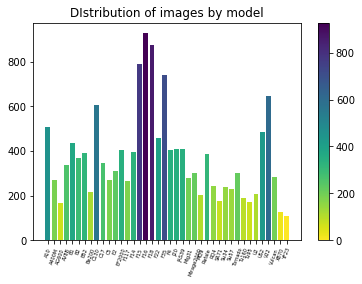

In [4]:
models = os.listdir("images/crop")
n = [len(os.listdir(f"images/crop/{model}")) for model in models]

norm = Normalize(vmin=min(n), vmax=max(n))
plt.bar(models, n, color=my_cmap(norm(n)))
plt.xticks(rotation=70, fontsize=5)
plt.title("DIstribution of images by model")

# Create scale
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0, max(n)))
cbar = plt.colorbar(sm)

plt.show()
plt.close()

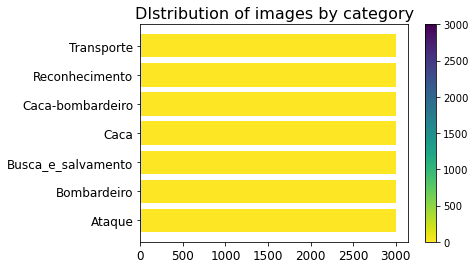

In [6]:
categories = os.listdir("images/crop_new")
n = [len(os.listdir(f"images/crop_new/{cat}")) for cat in categories]
norm = Normalize(vmin=min(n), vmax=max(n))

plt.barh(categories, n, color=my_cmap(norm(n)))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("DIstribution of images by category", fontsize=16)

# Create scale
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0, max(n)))
cbar = plt.colorbar(sm)

plt.show()
plt.close()

<div style="background-image: url('images/chain.jpg'); background-size: cover; border-radius: 20px; width: 100%;">
    <h1 style="color: white; padding: 20px;">2. Probability distributions</h1>
</div>

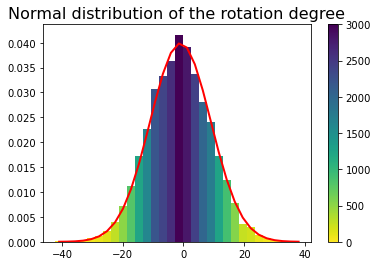

In [7]:
# Generate some data
mu, sigma = 0, 10
data = np.random.normal(mu, sigma, 10000)

# Calculate the histogram
counts, bins = np.histogram(data, bins=30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu + 1)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

# Plot the histogram
for i in range(len(counts)):
    plt.bar(bins[i], counts[i], width=bins[1]-bins[0], color=my_cmap((counts[i]-counts.min())/(counts.max()-counts.min())))

plt.title("Normal distribution of the rotation degree", fontsize=16)

# Create scale
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0, max(n)))
cbar = plt.colorbar(sm)

plt.show()

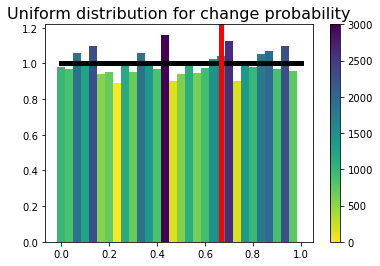

In [8]:
# Generate some data
data = np.random.uniform(0, 1, 10000)

# Calculate the histogram
counts, bins = np.histogram(data, bins=30, density=True)

plt.plot(bins, np.ones_like(bins), linewidth=5, color='black')
plt.axvline(x = 2/3, color = 'red', linewidth=5)

# Plot the histogram
for i in range(len(counts)):
    plt.bar(bins[i], counts[i], width=bins[1]-bins[0], color=my_cmap((counts[i]-counts.min())/(counts.max()-counts.min())))

plt.title("Uniform distribution for change probability", fontsize=16)

# Create scale
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0, max(n)))
cbar = plt.colorbar(sm)

plt.show()

It is possible to observe that the categories are very unbalenced in terms of cardinality. To solve this problem we will resort to two techniques to balance the number of images per class. The first method is undersampling, in which observations from the dominant class are randomly removed. In this case, the dominant class is "Caça" and it presents 6600 images, we will start by reducing this number to 3000. Secondly, we will do the oposite, oversampling, that consists of increasing the number of observations of the non dominant classes. To achieve this goal the following method will be applied. For each class, randomly select images and perform operations on them, such as splits, rotations, deslocations, etc... until the number of images in that class reaches 3000. By that time the dataset will be balanced.

<div style="background-image: url('images/chain.jpg'); background-size: cover; border-radius: 20px; width: 100%;">
    <h1 style="color: white; padding: 20px;">3. Balancing Script</h1>
</div>

In [9]:
categories = [os.listdir("images/crop_new")][0]
letters = string.ascii_lowercase

for cat in categories:
    img_paths = os.listdir(f"images/crop_new/{cat}")
    n_initial = len(img_paths)
    n = n_initial
    print("\n", n_initial, "-", cat)
    
    if n_initial > 3000:
        files_to_delete = random.sample(img_paths, n_initial - 3000)
        for file in files_to_delete:
            file_path = os.path.join(f"images/crop_new/{cat}", file)
            os.remove(file_path)

    while n < 3000:
        img_index = random.sample(range(n_initial), k=1)[0]
        image = cv2.imread(f"images/crop_new/{cat}/{img_paths[img_index]}")
        rows, cols= image.shape [:2]
        changed = False

        # Flip horizontal (33.3%)
        if random.random() > 2/3:
            changed = True
            image = cv2.flip(image, 0)

        # FLip vertically (33.3%)
        if random.random() > 2/3:
            changed = True
            image = cv2.flip(image, 0)

        # Rotate (33.3%)
        if random.random() > 2/3:
            changed = True
            degrees = np.random.normal(0, 10, 1)[0]
            m = cv2.getRotationMatrix2D((cols/2, rows/2), degrees, 1)
            image = cv2.warpAffine(image, m, (cols, rows)) 

        if changed:
            random_code = ''.join(random.choice(letters) for i in range(5))
            cv2.imwrite(f"images/crop_new/{cat}/{random_code}_{img_paths[img_index]}", image)
            n += 1
            if n % 30 == 0:
                print(round(n/3000*100),"%")
            


 3000 - Ataque

 3000 - Bombardeiro

 3000 - Busca_e_salvamento

 3000 - Caca

 3000 - Caca-bombardeiro

 3000 - Reconhecimento

 3000 - Transporte


<div style="background-image: url('images/chain.jpg'); background-size: cover; border-radius: 20px; width: 100%;">
    <h1 style="color: white; padding: 20px;">4. Balancing Result</h1>
</div>

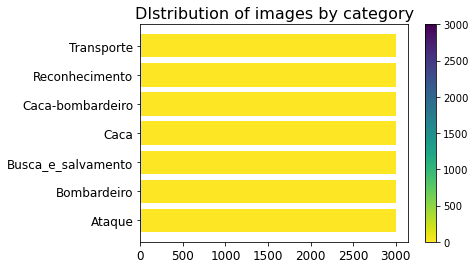

In [10]:
categories = os.listdir("images/crop_new")
n = [len(os.listdir(f"images/crop_new/{cat}")) for cat in categories]
norm = Normalize(vmin=min(n), vmax=max(n))

plt.barh(categories, n, color=my_cmap(norm(n)))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("DIstribution of images by category", fontsize=16)

# Create scale
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0, max(n)))
cbar = plt.colorbar(sm)

plt.show()
plt.close()